In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd
df=pd.read_csv('Iris.csv')
df.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
117,7.7,3.8,6.7,2.2,Iris-virginica
32,5.2,4.1,1.5,0.1,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor
37,4.9,3.1,1.5,0.1,Iris-setosa
106,4.9,2.5,4.5,1.7,Iris-virginica
58,6.6,2.9,4.6,1.3,Iris-versicolor
34,4.9,3.1,1.5,0.1,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
141,6.9,3.1,5.1,2.3,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [3]:
df.isnull().sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [4]:
number=LabelEncoder()
df['Class']= number.fit_transform(df['Class'].astype('str'))
df.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
47,4.6,3.2,1.4,0.2,0
89,5.5,2.5,4.0,1.3,1
72,6.3,2.5,4.9,1.5,1
136,6.3,3.4,5.6,2.4,2
144,6.7,3.3,5.7,2.5,2
66,5.6,3.0,4.5,1.5,1
81,5.5,2.4,3.7,1.0,1
34,4.9,3.1,1.5,0.1,0
24,4.8,3.4,1.9,0.2,0
63,6.1,2.9,4.7,1.4,1


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [5]:
df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [6]:
df.var()

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D53A248A90>,
      dtype=object)

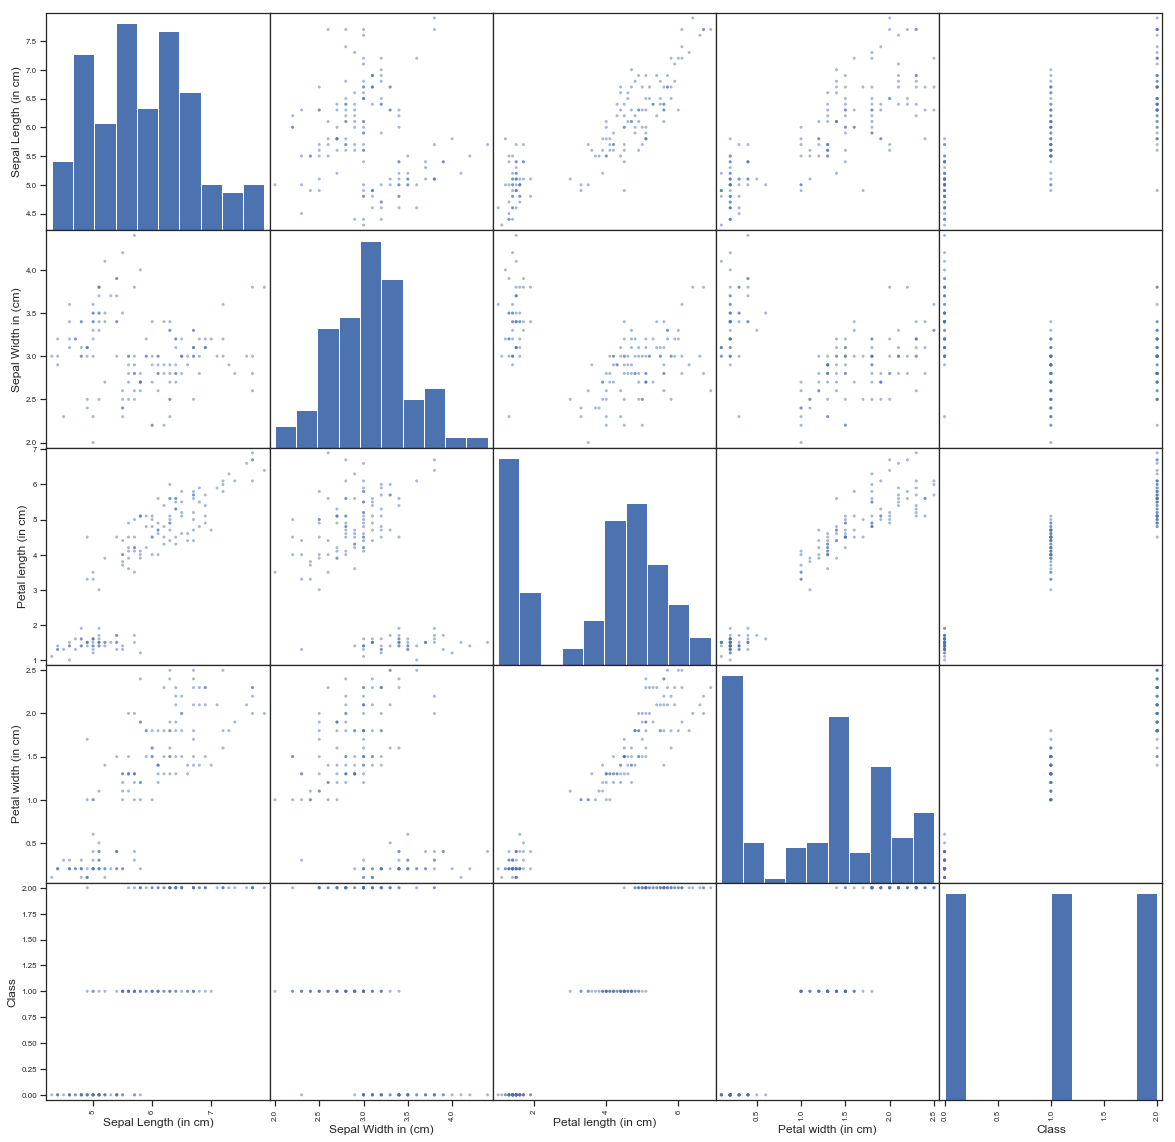

In [18]:
pd.plotting.scatter_matrix(df,figsize=(20,20))

# OR

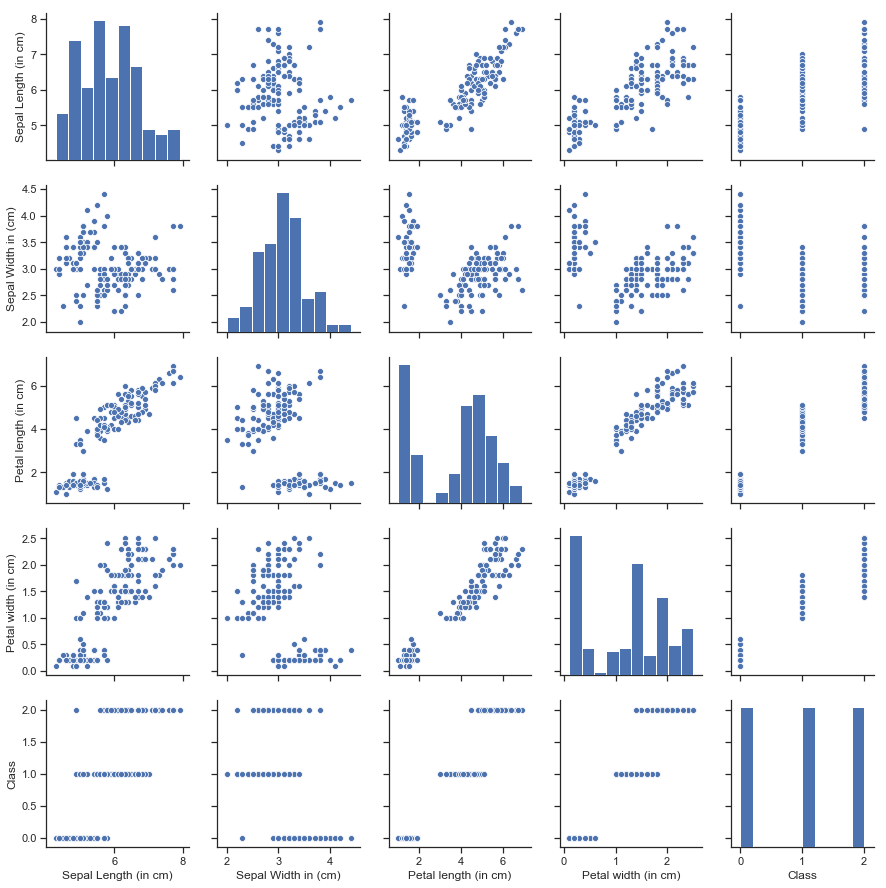

In [8]:
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

sns.pairplot(df)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [9]:
X=df.drop(['Class'],axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [10]:
X_train.shape

(120, 4)

In [11]:
X_test.shape

(30, 4)

In [12]:
y_train.shape

(120,)

In [13]:
y_test.shape

(30,)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [14]:
from sklearn.metrics import accuracy_score
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
for i in 3,5,9:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_pred=knn.predict(X_test)
    print("For k= ",i)
    print('Testing accuracy=',accuracy_score(y_test,test_pred))
    train_pred=knn.predict(X_train)
    print('Training accuracy=',accuracy_score(y_train,train_pred))


For k=  3
Testing accuracy= 0.9666666666666667
Training accuracy= 0.9666666666666667
For k=  5
Testing accuracy= 1.0
Training accuracy= 0.9583333333333334
For k=  9
Testing accuracy= 1.0
Training accuracy= 0.9666666666666667


## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [15]:
optimal_K = 1
model_error = 0
index = 0
df_index = []
df_values = []
dataframe_plot = pd.Series()
neighbors=np.arange(1,20,2)
for number_of_neighbor in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=number_of_neighbor)
    knn_model.fit(X_train, y_train)
    test_error = 1 - accuracy_score(y_test, knn_model.predict(X_test))
    df_index.append(number_of_neighbor)
    df_values.append(test_error)
    if(index == 0):
        model_error = test_error
        index = 1
    if(model_error > test_error):
        model_error = test_error
        optimal_K = number_of_neighbor

print("The optimal number of neighbour is ", optimal_K)

The optimal number of neighbour is  5


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

Text(0.5, 0, 'No of k in knn')

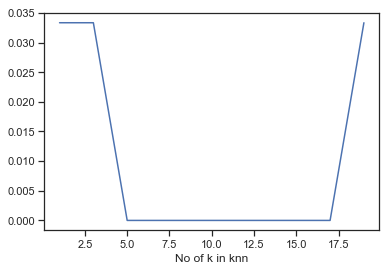

In [17]:

MSE_dataframe = pd.DataFrame(data=df_values, index=df_index)

MSE_dataframe.head(10)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(MSE_dataframe)
plt.xlabel('No of k in knn')